##### Importing Libraries

In [13]:
!pip install missingno

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as mn

In [15]:
data = pd.read_csv('../Data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [26]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking Missing Data in Dataset

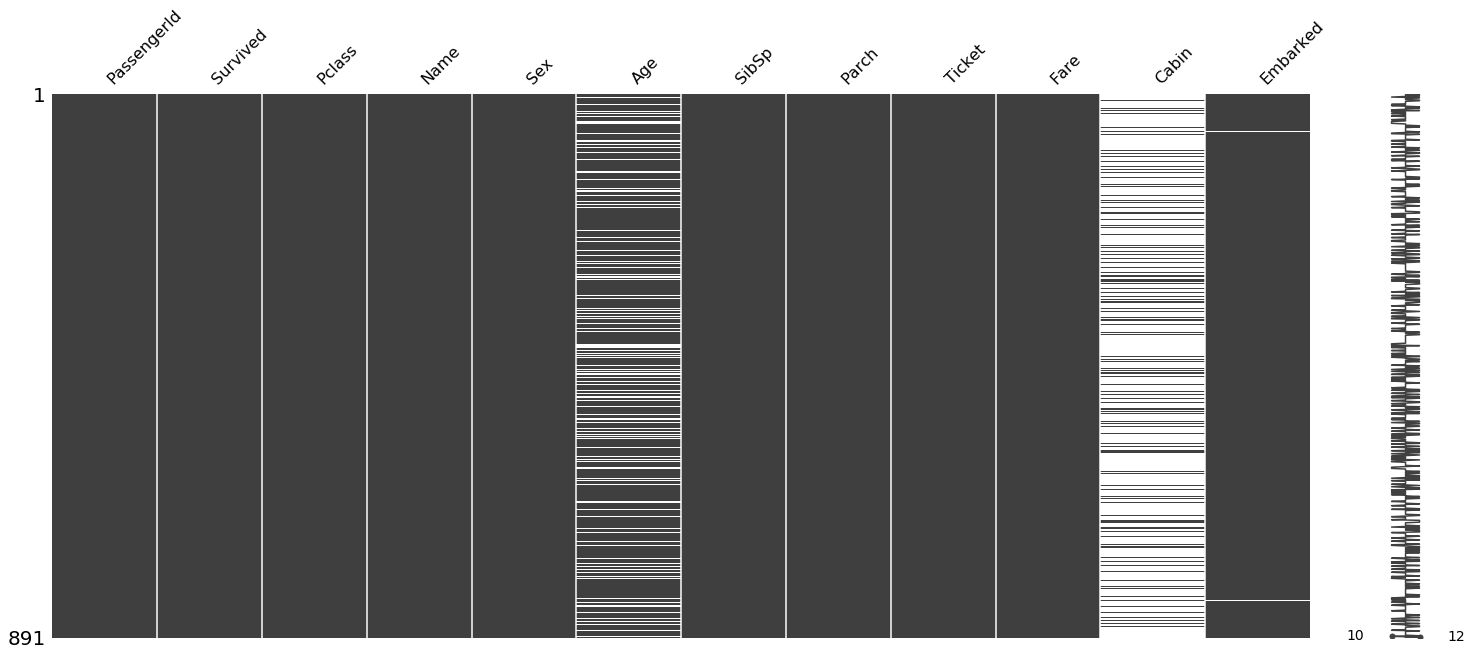

In [21]:
%matplotlib inline
mn.matrix(data)

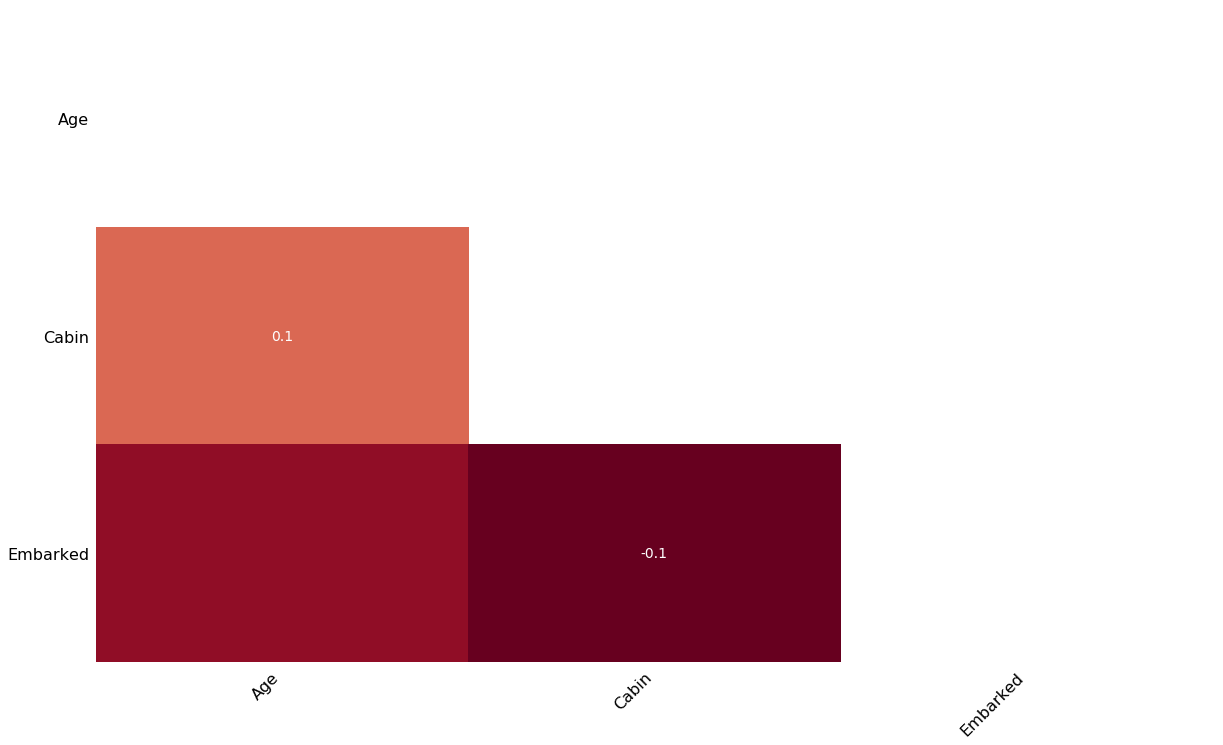

In [22]:
%matplotlib inline
mn.heatmap(data)

#### Checking Survival Ratio by Age

In [96]:
split_age = pd.DataFrame(data.groupby('Age')['Survived'].mean())
split_age.head()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0


In [89]:
type(split_age)

pandas.core.frame.DataFrame

###### Line Plot

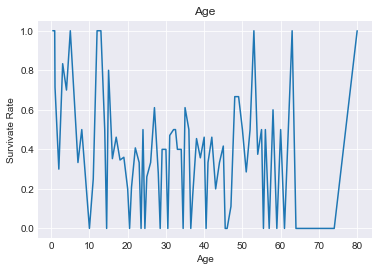

In [90]:
plt.plot(split_age)
plt.ylabel('Survivate Rate')
plt.xlabel('Age')
plt.title('Age')
plt.show()

###### Scatter Plot

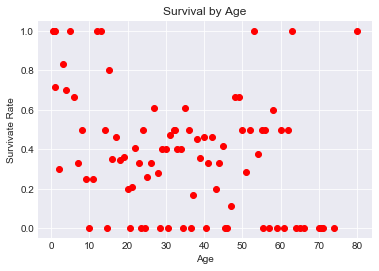

In [91]:
plt.plot(split_age, 'ro')
plt.ylabel('Survivate Rate')
plt.xlabel('Age')
plt.title('Survival by Age')
plt.show()

In [131]:
split_sex = pd.DataFrame(data.groupby('Sex')['Sex','Survived'].mean())
split_sex.head()

,Survived
Sex,
female,0.742038
male,0.188908


In [133]:
split_class = pd.DataFrame(data.groupby('Embarked')['Embarked','Survived'].mean())
split_class.head()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [146]:
split_class = data['Survived'].groupby([data['Embarked'], data['Sex']]).mean().unstack()
split_class

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603
